In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import scale

%matplotlib inline
mpl.rcParams['figure.figsize'] = [12, 8]

In [2]:
baskets = pd.read_csv('../../data/features/baskets.csv')

In [4]:
amode = lambda x: mode(x)[0]
order_types = baskets.groupby('label').agg({
    'reordered':    'mean',
    'organic':      'mean',
    'popular':      'mean',
    'prepared':     'mean',
    'dairy':        'mean',
    'gluten':       'mean',
    'snack':        'mean',
    'meat':         'mean',
    'fish':         'mean',
    'beverage':     'mean',
    'veg':          'mean',
    'order_size':   'mean',

    'order_dow':              amode,
    'order_hour_of_day':      amode,
    'days_since_prior_order': amode,
    'order_size':             amode
})

In [5]:
order_types

,reordered,organic,popular,prepared,dairy,gluten,snack,meat,fish,beverage,veg,order_size,order_dow,order_hour_of_day,days_since_prior_order
label,,,,,,,,,,,,,,,
0,0.600095,0.156484,0.161600,0.288093,0.071346,0.110391,0.250163,0.287726,0.000000,0.221319,0.123897,5.0,1,10,30.0
1,0.588255,0.367479,0.129889,0.182276,0.188914,0.147008,0.110556,0.000000,0.000000,0.000000,0.384780,9.0,0,15,7.0
2,0.598427,0.255848,0.121686,0.218987,0.137777,0.117475,0.126103,0.078650,0.000000,0.112737,0.267976,21.0,0,11,7.0
3,0.579120,0.250710,0.145838,0.161654,0.080441,0.288018,0.325448,0.000000,0.000000,0.000000,0.227997,4.0,1,10,30.0
4,0.637399,0.391454,0.175001,0.259927,0.215316,0.000000,0.000000,0.033508,0.000000,0.000000,0.534676,2.0,1,10,30.0
5,0.563460,0.230863,0.116097,0.330840,0.114129,0.093727,0.092174,0.179480,0.179516,0.067658,0.269351,7.0,0,15,30.0
6,0.574473,0.318666,0.146874,0.250268,0.145302,0.141285,0.141393,0.123015,0.000000,0.000000,0.319515,9.0,0,14,7.0
7,0.588162,0.277942,0.143356,0.235275,0.140116,0.112904,0.115864,0.103724,0.000000,0.079792,0.291528,11.0,0,15,7.0
8,0.508424,0.146892,0.000000,0.225230,0.000000,0.000000,0.000000,0.101391,0.029470,0.000000,0.000000,1.0,1,11,30.0


/Users/michaelfedell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


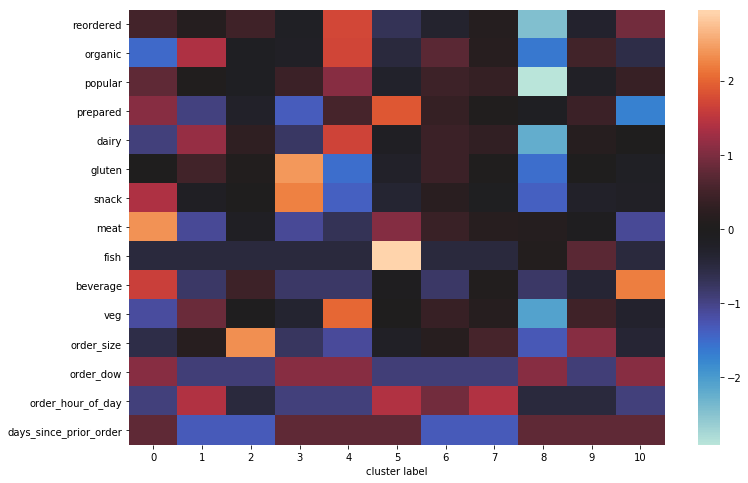

In [33]:
plot_data = pd.DataFrame(scale(order_types), columns=order_types.columns).transpose()
ax = sns.heatmap(plot_data, center=0)
plt.xlabel('cluster label')
plt.show()